# What is the projected career path and salary for a Data Analyst?

In [11]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [13]:
df_us = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

In [14]:
df['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [15]:
analyst_career_classic_list = ['Data Analyst', 'Senior Data Analyst']
analyst_career_trans_roles = ['Data Analyst', 'Data Engineer', 'Senior Data Engineer', 'Data Scientist', 'Senior Data Scientist', 'Machine Learning Engineer', 'Business Analyst']

In [18]:
df_us_career_classic = df_us[df_us['job_title_short'].isin(analyst_career_classic_list)]

df_us_career_trans = df_us[df_us['job_title_short'].isin(analyst_career_trans_roles)]

In [40]:
salary_median_classic = df_us_career_classic.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)
salary_median_order_classic = salary_median_classic.index.tolist()

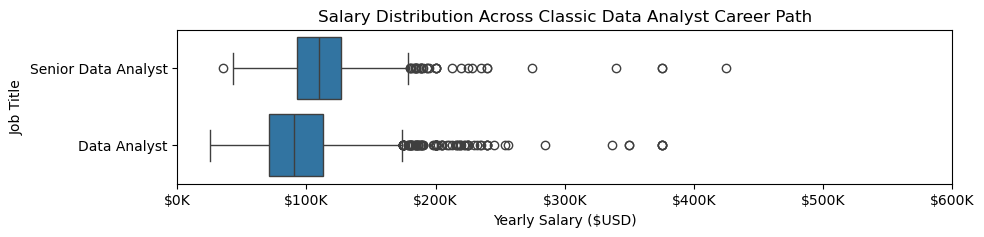

In [42]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df_us_career_classic, x='salary_year_avg', y='job_title_short', order=salary_median_order_classic)
plt.title('Salary Distribution Across Classic Data Analyst Career Path')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [37]:
salary_median_transit = df_us_career_trans.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)
salary_median_order_transit = salary_median_transit.index.tolist()

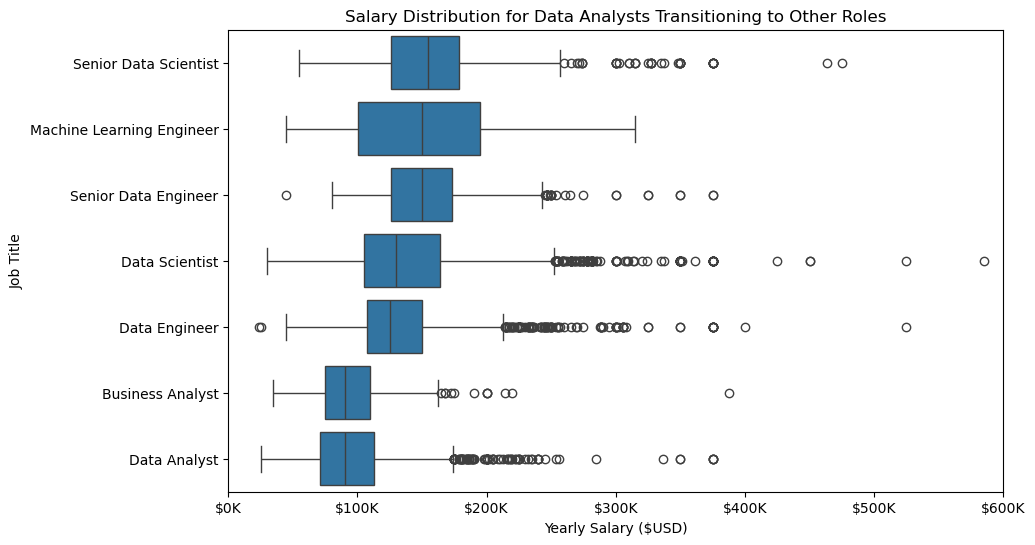

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_us_career_trans, x='salary_year_avg', y='job_title_short', order=salary_median_order_transit)
plt.title('Salary Distribution for Data Analysts Transitioning to Other Roles')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()